# CLUSTERING OF MUSIC GENRES

# Group Members
This project was done with collaboration with the following people
<ol>
<li>FARAYOLA GRACE (ME)</li>
<li>BABATUNDE OLAITAN</li>
<li>ELUDINI INIOLUWA</li>
<li>UGWUONAH IRENE</li>
</ol>

## Introduction

Music is sound that has been organized by using rhythm, melody or harmony. 
Every person has a different taste in music. People prefer styles of music that are consistent with their personalities. Music recommendation on streaming apps depends on the information of the kind of songs a person listens to daily, as well as the similarities in the music files so as to recommend similar music to the person.
That is where the cluster analysis of music genres comes in. A dataset of popular songs on Spotify, which contains artists and music names with all audio characteristics including Beats Per Minute (BPM), Energy, Danceability, Loudness(dB), Liveness, Valence, Length(Duration), Acousticness, Speechiness and  Popularity of each music was extracted. The goal is to group music genres based on similarities in their audio characteristics.

Spotify is a proprietary Swedish audio streaming and media services provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon. It is one of the largest music streaming service providers, with over 422 million monthly active users, including 182 million paying subscribers, as of March 2022.
Spotify offers digital copyright restricted recorded music and podcasts, including more than 82 million songs, from record labels and media companies. 
Spotify is currently available in 180+ countries, as of October 2021. Users can  browse or search for music based on artist, album, genre, playlist, or record label, and can create, edit, and share playlists. 
 

### Summary

This dataset contains audio statistics of the top tracks on Spotify. The data contains columns each describing the track and the music qualities. The tracks are songs from 1959 to 2019 of some notable and famous artists. The audio features from the tracks were extracted through Spotify API. The dataset consists of these features:
Index: ID
Title: Name of the track
Artist: Name of the Artist
Top Genre: Genre of the track
Year: Release year of the track\
Beats Per Minute (BPM): The tempo of the song
Energy: The energy of the song
Danceability
Loudness (dB)
Liveness
Valence
Length (Duration)
Acousticness
Popularity

Instrumentalness: This value represents the amount of vocals in the song.
Acousticness: This value describes how acoustic a song is. 
Liveness: This value describes the probability that the song was recorded with a live audience. 
Speechiness: Speechiness detects the presence of spoken words in a track”. 
Energy: Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 
Valence: It describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

Importing and reading data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
spotify_data = pd.read_csv("../input/spotify-top-2000s-mega-dataset/Spotify-2000.csv")
spotify_data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [2]:
spotify_data.shape #the numbers of data rows and columns

(1994, 15)

In [3]:
spotify_data.info() #the information of the data :The column names,  count of null values and their data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

### Data Cleaning

In [4]:
spotify_data.isnull().sum() #The sum of null values in each column.

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
print(spotify_data.duplicated())
spotify_data #To check for duplicates in the data

0       False
1       False
2       False
3       False
4       False
        ...  
1989    False
1990    False
1991    False
1992    False
1993    False
Length: 1994, dtype: bool


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [6]:
spotify_data.dtypes #To check the data types

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [7]:
spotify_data["Length (Duration)"] = spotify_data["Length (Duration)"].str.replace(',','') 
#To remove the ',' in 'Length (Duration) values'

In [8]:
spotify_data["Length (Duration)"] = spotify_data["Length (Duration)"].astype('int64')
# To change the datatype of "Length (Duration)" from object to int64

In [9]:
spotify_data.dtypes #To check if the change of datatype as been effected 

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)          int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

## Data Exploration

In [10]:
spotify_data.describe().T #for statistical description

,count,mean,std,min,25%,50%,75%,max
Index,1994.0,997.500000,575.762538,1.0,499.25,997.5,1495.75,1994.0
Year,1994.0,1992.992979,16.116048,1956.0,1979.00,1993.0,2007.00,2019.0
Beats Per Minute (BPM),1994.0,120.215647,28.028096,37.0,99.00,119.0,136.00,206.0
Energy,1994.0,59.679539,22.154322,3.0,42.00,61.0,78.00,100.0
Danceability,1994.0,53.238215,15.351507,10.0,43.00,53.0,64.00,96.0
Loudness (dB),1994.0,-9.008526,3.647876,-27.0,-11.00,-8.0,-6.00,-2.0
Liveness,1994.0,19.012036,16.727378,2.0,9.00,12.0,23.00,99.0
Valence,1994.0,49.408726,24.858212,3.0,29.00,47.0,69.75,99.0
Length (Duration),1994.0,262.443330,93.604387,93.0,212.00,245.0,289.00,1412.0
Acousticness,1994.0,28.858074,29.011986,0.0,3.00,18.0,50.00,99.0


In [11]:
spotify_data["Top Genre"].describe()

count           1994
unique           149
top       album rock
freq             413
Name: Top Genre, dtype: object

In [12]:
spotify_data["Top Genre"].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [13]:
spotify_data["Artist"].describe()

count      1994
unique      731
top       Queen
freq         37
Name: Artist, dtype: object

In [14]:
spotify_data["Artist"].value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Peter Schilling        1
The Buoys              1
New Order              1
Limp Bizkit            1
Fats Domino            1
Name: Artist, Length: 731, dtype: int64

In [15]:
spotify_data["Year"].value_counts()

2008    54
1991    52
2018    52
1977    51
2002    47
        ..
1962     3
1959     3
1961     1
1960     1
1956     1
Name: Year, Length: 63, dtype: int64

In [16]:
Topgenre =spotify_data.groupby('Top Genre').agg({'Popularity':'sum'}).sort_values('Popularity',ascending=False)
Topgenre

,Popularity
Top Genre,
album rock,25067
adult standards,7697
alternative rock,5757
dance pop,5687
alternative metal,4621
...,...
australian alternative rock,33
rock-and-roll,33
compositional ambient,28


In [17]:
Artist_pop =spotify_data.groupby('Artist').agg({'Popularity':'sum'}).sort_values('Popularity',ascending=False)
Artist_pop

,Popularity
Artist,
The Beatles,2451
Queen,2085
Coldplay,1888
Michael Jackson,1511
The Rolling Stones,1496
...,...
Spider Murphy Gang,26
Paolo Conte,25
Zucchero,24


In [18]:
spotify_data.groupby('Top Genre').mean().T

Top Genre,acid jazz,acoustic pop,adult standards,afropop,alaska indie,album rock,alternative country,alternative dance,alternative hip hop,alternative metal,...,reggae,reggae fusion,rock-and-roll,scottish singer-songwriter,soft rock,stomp and holler,streektaal,trance,uk pop,yacht rock
Index,185.0,355.25,1253.170732,30.0,557.0,1170.556901,1413.0,481.866667,182.5,951.885714,...,1109.250,1036.50,640.0,243.5,182.0,580.0,691.0,202.0,348.0,1288.0
Year,2006.0,2007.25,1979.016260,2004.0,2013.0,1980.883777,1987.0,2009.733333,2003.0,1999.800000,...,1978.500,1988.50,2015.0,2007.0,2004.0,2014.0,2017.0,2004.0,2005.0,1984.0
Beats Per Minute (BPM),92.0,123.75,117.105691,154.0,131.0,121.929782,156.0,129.466667,153.5,124.442857,...,107.250,124.00,127.0,103.0,109.0,102.0,98.0,138.0,82.0,129.0
Energy,95.0,28.25,42.658537,70.0,22.0,59.549637,41.0,84.533333,70.0,73.885714,...,56.250,46.50,47.0,87.5,78.0,73.0,21.0,85.0,25.0,92.0
Danceability,66.0,48.75,49.162602,68.0,46.0,51.411622,45.0,49.400000,74.0,45.742857,...,77.125,86.25,76.0,61.0,70.0,48.0,61.0,60.0,53.0,74.0
Loudness (dB),-5.0,-11.25,-11.504065,-10.0,-10.0,-10.014528,-11.0,-5.200000,-8.0,-6.500000,...,-9.125,-12.00,-7.0,-5.0,-8.0,-5.0,-20.0,-6.0,-16.0,-5.0
Liveness,14.0,16.50,19.243902,33.0,11.0,17.924939,12.0,23.133333,34.0,18.742857,...,26.500,15.50,10.0,9.0,6.0,21.0,8.0,6.0,12.0,8.0
Valence,52.0,25.75,53.398374,51.0,15.0,52.721550,32.0,37.533333,64.5,40.314286,...,74.125,86.50,77.0,65.0,39.0,43.0,42.0,9.0,34.0,93.0
Length (Duration),229.0,247.00,218.626016,306.0,243.0,295.871671,245.0,294.200000,282.0,277.442857,...,257.125,212.75,157.0,199.5,289.0,215.0,274.0,235.0,197.0,306.0
Acousticness,13.0,58.25,51.382114,8.0,90.0,26.847458,74.0,2.533333,1.5,10.614286,...,21.000,6.25,54.0,15.0,9.0,3.0,60.0,1.0,52.0,11.0


In [19]:
spotify_data.drop(columns = ['Index','Title','Artist','Top Genre','Year'], inplace = True)
spotify_data

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,201,94,3,71
1,135,79,50,-11,17,81,207,17,7,39
2,168,69,66,-9,7,52,341,2,17,69
3,173,96,43,-4,3,37,269,0,4,76
4,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,128,84,7,63
1990,175,76,36,-8,76,95,136,73,6,69
1991,168,80,53,-9,31,97,162,74,7,74
1992,174,26,45,-13,7,60,324,54,4,65


In [20]:
spotify_data.corr().T


,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Beats Per Minute (BPM),1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness (dB),0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length (Duration),0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604
Speechiness,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.027826,-0.098256,1.000000,0.111689
Popularity,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.065403,-0.087604,0.111689,1.000000


### Data Visualization

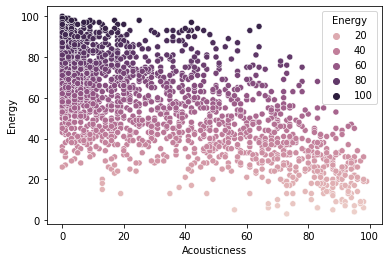

In [21]:
sns.scatterplot(x=spotify_data['Acousticness'], y=spotify_data['Energy'], data=spotify_data,  hue='Energy')
plt.show()

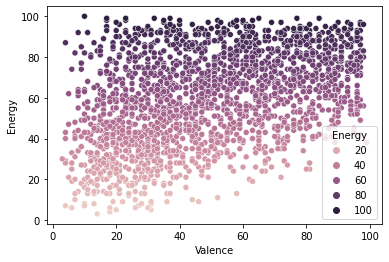

In [22]:
sns.scatterplot(x=spotify_data['Valence'], y=spotify_data['Energy'], data=spotify_data,  hue='Energy')
plt.show()

### Machine Learning

Clustering is a type of Unsupervised Learning to Collect similar data in groups called clusters. Data points clustered together in a graph are often used to classify into clusters.
K-means is an unsupervised method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
X = spotify_data[['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
                 'Liveness', 'Valence', 'Length (Duration)','Acousticness','Speechiness','Popularity']].copy()

In [25]:
inertias = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(X)
    inertias.append(kmean.inertia_)
#The elbow method helps to visualize and choose the optimum value(inertias) of ‘k’ 
#(number of clusters) by fitting the model with a range of values of ‘k’.

In [26]:
sns.set()

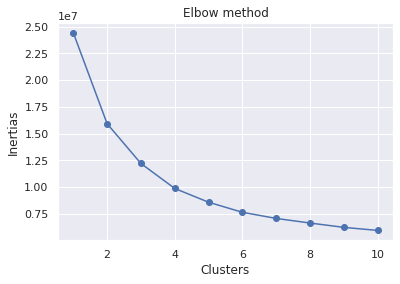

In [27]:
plt.plot (range(1,11),inertias,marker='o')
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.show()

The elbow method shows that 4 is a good value for K

In [28]:
cluster_input =X[['Acousticness', 'Energy']]
Kmeans_model = KMeans(n_clusters = 4)
Kmeans_model
#feature selection for clustering

KMeans(n_clusters=4)

In [29]:
cluster_output = Kmeans_model.fit_predict(cluster_input)
type(cluster_output)


numpy.ndarray

In [30]:
cluster_output_pd = pd.DataFrame(cluster_output,columns=['segment'])
cluster_output_pd.head()

,segment
0,1
1,2
2,2
3,2
4,2


In [31]:
segment_DF = pd.concat([cluster_input,cluster_output_pd],axis=1)
segment_DF.head()

,Acousticness,Energy,segment
0,94,30,1
1,17,79,2
2,2,69,2
3,0,96,2
4,1,82,2


In [32]:
Kmeans_model.cluster_centers_

array([[12.23408624, 50.95482546],
       [78.61861862, 28.81681682],
       [ 7.21960784, 81.41568627],
       [48.61124694, 54.5403423 ]])

In [33]:
import matplotlib.pyplot as plt

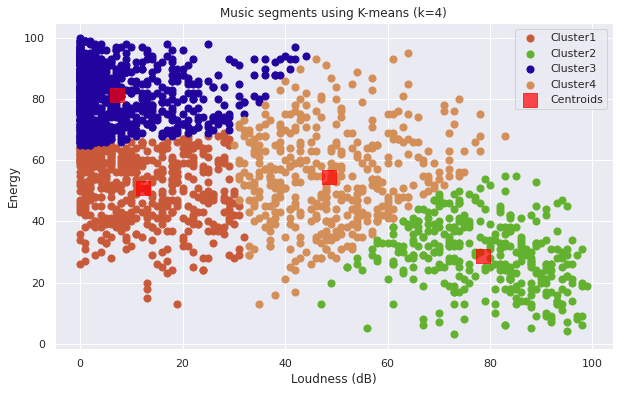

In [34]:
plt.figure(figsize= (10,6))
plt.scatter(segment_DF[segment_DF.segment==0]['Acousticness'],segment_DF[segment_DF.segment==0]['Energy'],s=50, c='#c85a39',label='Cluster1')

plt.scatter(segment_DF[segment_DF.segment==1]['Acousticness'],segment_DF[segment_DF.segment==1]['Energy'],s=50, c='#63b22f',label='Cluster2')

plt.scatter(segment_DF[segment_DF.segment==2]['Acousticness'],segment_DF[segment_DF.segment==2]['Energy'],s=50, c='#23039e',label='Cluster3')

plt.scatter(segment_DF[segment_DF.segment==3]['Acousticness'],segment_DF[segment_DF.segment==3]['Energy'],s=50, c='#d48e57',label='Cluster4')

plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')


plt.title('Music segments using K-means (k=4)')

plt.xlabel('Loudness (dB)')

plt.ylabel('Energy')

plt.legend()

plt.show()

In [35]:
spotify_data_genre=pd.concat([spotify_data ,cluster_output_pd],axis=1)
spotify_data_genre.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,segment
0,157,30,53,-14,11,68,201,94,3,71,1
1,135,79,50,-11,17,81,207,17,7,39,2
2,168,69,66,-9,7,52,341,2,17,69,2
3,173,96,43,-4,3,37,269,0,4,76,2
4,106,82,58,-5,10,87,256,1,3,59,2


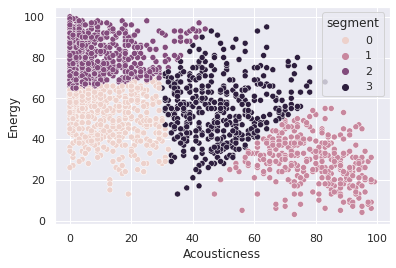

In [36]:

sns.scatterplot(x=spotify_data_genre['Acousticness'], y=spotify_data_genre['Energy'], data=spotify_data_genre,  hue='segment')
plt.show()

In [37]:
p={'Acousticness':[17,2,0, 88], "Energy":[79, 69,96,5]}
ff=pd.DataFrame(p)
ff
#creating a prediction data

,Acousticness,Energy
0,17,79
1,2,69
2,0,96
3,88,5


In [38]:
prediction = Kmeans_model.fit_predict(ff)
print(prediction)
#predicting the new data cluster segment

[0 3 2 1]
